In [79]:
#from pyimagesearch.facedetector import FaceDetector
import cv2
import matplotlib.pyplot as plt
#import argparse

# path the Haar Cascade pretrain XML files
path = '/home/beltus/image/frontalFace10/haarcascade_frontalface_default.xml';
path2 = '/home/beltus/image/frontalEyes35x16XML/haarcascade_eye.xml'



In [112]:

# Face Detector Class
class Detector:
    
    # Method to create an instance of the Face Detector Class.
    
    def __init__ (self, faceCascadePath):
        
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath); # Initialize instances to CascadeClassifier
    
    #def get_classifier_path(self):
        #return self.path;
    
    #def set_classifier_path(self, new_path):
       # self.path = new_path;   
    
    def detect(self, image, scaleFactor = 1.05, minNeighbors = 4, minSize = 30):
        # Method encapsulating the detectmultiscale method of CascadeClassifier as it has same input parameter
        rects = self.faceCascade.detectMultiScale(image , scaleFactor , minNeighbors , minSize); # Detection method
                
        return rects; # Returns a list of turple. Each turple with x,y coordinates of detected face and width and height of the detected face.
        
        
        

I found %d Faces(s) 6


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f2c825e4f60>)

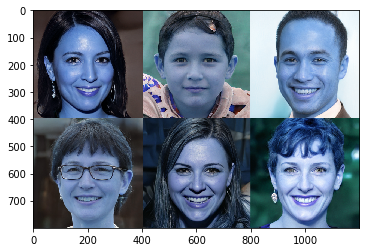

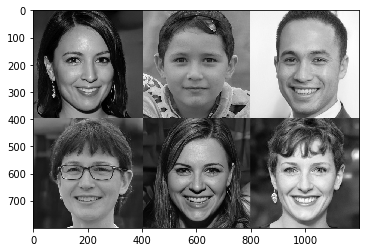

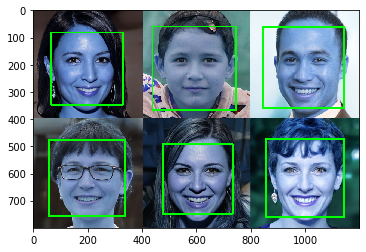

In [113]:

img  = cv2.imread('faces.png');
plt.figure() , plt.imshow(img)
cv2.imwrite('belgray.jpg' , cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)); # convert to gray scale
gray  = cv2.imread('belgray.jpg');
g = gray.copy();
m = img.copy();
plt.figure() , plt.imshow(gray)
#cv2.imshow(img);

# create an object our face detector
facedetect = Detector(path);

face_rect = facedetect.detect(gray , scaleFactor = 1.2, minNeighbors = 4  , minSize = 30 ); # Call to the detectmultiscale function.


print('I found %d Faces(s)'  , len(face_rect)); #Number of faces in image

# loop thru all the detected faces
for i in face_rect:
        cv2.rectangle(img , (i[0], i[1]), (i[0] + i[2] , i[1] + i[3]) , (0, 255 , 0) , 6); # Draw a rectangle around the faces.
        
        
        
plt.figure(), plt.imshow(img)

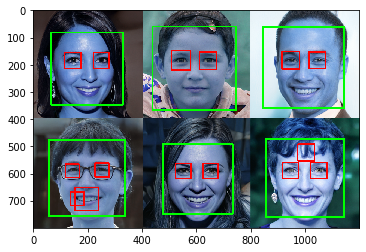

In [115]:
# Create object for Eye Detector
eyedetect = Detector(path2);

#eye_rect = eyedetect.detectMultiScale(g, scaleFactor = 1.05, minNeighbors = 4  , minSize = 5 ); # Call to the detectmultiscale function.

# loop thru all the detected faces
for (x,y,w,h) in face_rect:
        cv2.rectangle(img, (x, y), (x + w, y + h) , (0, 255 , 0) , 4); # Draw a rectangle around the faces.
        
        roi = gray[y:y+h, x:x+w]; # section of image where face is found
        roic = img[y:y+ h, x:x+w]; #section of image where face is found in original image

        eyes = eyedetect.detect(roi, 1.1 , 6); # detect the eyes in the area of interest.
        
        for (ex, ey , ew ,eh) in eyes:
            cv2.rectangle(roic, (ex, ey) , (ex+ew , ey+eh), (255,0,0) , 4)
plt.figure() , plt.imshow(img) ; 

67 84
